In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("breast-cancer.csv")
df = df.drop(columns=["id"])
(df.head())
print(df.shape)
x_train = df.drop(columns=['diagnosis']).values
y_train = df['diagnosis'].map({'M':1,'B':0}).values
print(x_train.shape, y_train.shape)

(569, 31)
(569, 30) (569,)


In [15]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [16]:
def compute_cost(x,y,w,b,lambda_):
    m = x.shape[0]

    z = np.dot(x,w) + b
    f_wb = sigmoid(z)

    # Avoid log(0)
    epsilon = 1e-15
    f_wb = np.clip(f_wb, epsilon, 1 - epsilon)

    cost = np.sum(np.dot(-y,np.log(f_wb)) - np.dot(1-y,np.log(1-f_wb)))
    cost = cost/m

    w = np.sum(w**2)
    reg_cost = lambda_*(w)
    reg_cost = reg_cost/m

    return cost+reg_cost
    

In [17]:
def compute_gradient(x,y,w,b,lambda_):
    m = x.shape[0]
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    z = np.dot(x,w) + b
    f_wb = sigmoid(z)

    exe = f_wb-y
    dj_dw = np.dot(x.T,exe)
    dj_db = np.sum(exe)

    reg = (lambda_/m)*w
    dj_dw += reg
    return dj_dw/m,dj_db/m

In [18]:
def gradient_descent(x,y,w,b,alpha,iter,lambda_,compute_cost,compute_gradient):
    m = x.shape[0]
    J_hist = []
    for i in range(iter):
        
        dj_dw,dj_db = compute_gradient(x,y,w,b,lambda_)
        w = w-alpha*dj_dw
        b = b-alpha*dj_db

        if i%10 == 0 or i == iter-1:
            cost = compute_cost(x,y,w,b,lambda_)
            J_hist.append(cost)

    return w,b,J_hist

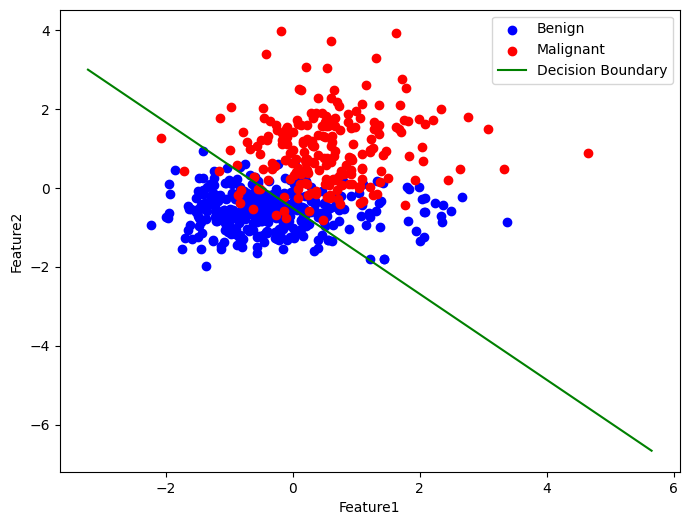

In [52]:
x_mean = np.mean(x_train,axis = 0)
x_std = np.std(x_train,axis = 0)
x_norm = (x_train - x_mean)/x_std

w = np.zeros(x_train.shape[1])
b=0
alpha = 0.01
iter = 100000
lambda_ = 0.05

w_final,b_final,J_hist = gradient_descent(x_norm,y_train,w,b,alpha,iter,lambda_,compute_cost,compute_gradient)

feature1 = 1  # first feature index
feature2 = 2  # second feature index

plt.figure(figsize=(8, 6))

# Scatter plot (use plt not pl)
plt.scatter(x_norm[y_train == 0, feature1], x_norm[y_train == 0, feature2], color='blue', label='Benign')
plt.scatter(x_norm[y_train == 1, feature1], x_norm[y_train == 1, feature2], color='red', label='Malignant')
plt.xlabel(f'Feature{feature1}')
plt.ylabel(f'Feature{feature2}')
plt.legend()

# Decision boundary: w1*x1 + w2*x2 + b = 0 => x2 = -(w1*x1 + b)/w2
x1_vals = np.linspace(x_norm[:, feature1].min()-1, x_norm[:, feature1].max()+1, 100)
if w_final[feature2] != 0:  # Avoid divide by zero
    x2_vals = -(w_final[feature1] * x1_vals + b_final) / w_final[feature2]
    plt.plot(x1_vals, x2_vals, color='green', label='Decision Boundary')

plt.legend()
plt.show()

In [53]:
def predict(x,w,b):
    z = np.dot(x,w) + b
    f_wb = sigmoid(z)
    return (f_wb>=0.5).astype(int)

In [57]:
new_input = np.array([
    17.99, 10.38, 122.80, 1001.0, 0.11840, 0.27760, 0.3001, 0.14710, 0.2419, 25.38,
    17.33, 184.60, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.11890, 2.0,
    20.00, 15.00, 130.0, 1100.0, 0.12, 0.28, 0.31, 0.15, 0.25, 26.0
])

new_input_norm = (new_input - x_mean)/x_std
prediction = predict(new_input_norm.reshape(1,-1),w_final,b_final)
y_pred = predict(x_norm,w_final,b_final)

if prediction[0] == 1:
    print("The input is predicted to be Malignant.")
else:
    print("The input is predicted to be Benign.")

The input is predicted to be Malignant.


Training accuracy: 98.77%


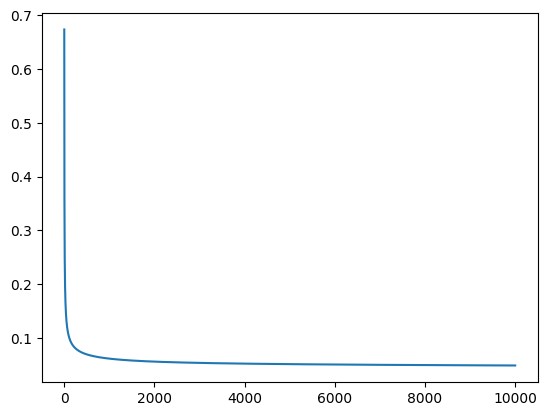

In [58]:
plt.plot(range(len(J_hist)),J_hist)
accuracy = np.mean(y_pred == y_train) * 100
print(f"Training accuracy: {accuracy:.2f}%")